## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

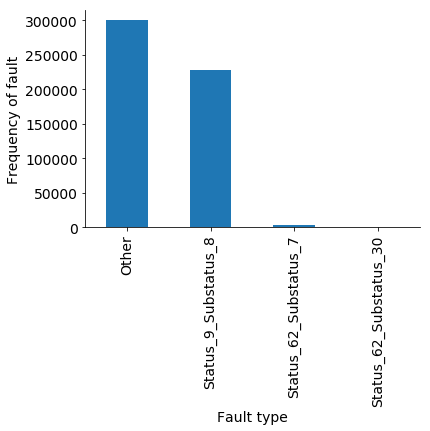

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [5]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000,"Status_9_Substatus_8")

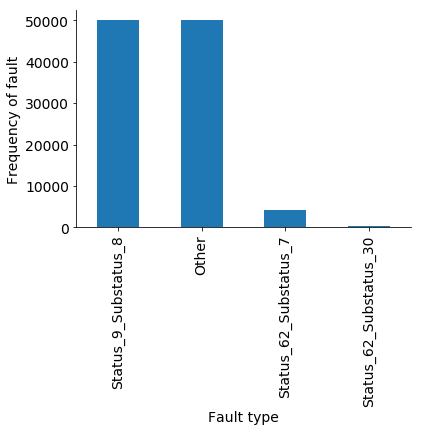

<Figure size 1440x1152 with 0 Axes>

In [6]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [7]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status

In [8]:
y.value_counts()

Status_9_Substatus_8      50000
Other                     50000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Split into training and test

In [14]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [15]:
y_train.value_counts()

Other                     33500
Status_9_Substatus_8      33500
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [16]:
y_test.value_counts()

Other                     16500
Status_9_Substatus_8      16500
Status_62_Substatus_7      1352
Status_62_Substatus_30      127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.91030303e-01 0.00000000e+00 3.27272727e-03 5.69696970e-03]
 [2.04724409e-01 7.63779528e-01 0.00000000e+00 3.14960630e-02]
 [1.33136095e-02 0.00000000e+00 9.86686391e-01 0.00000000e+00]
 [3.87878788e-03 1.21212121e-04 0.00000000e+00 9.96000000e-01]]


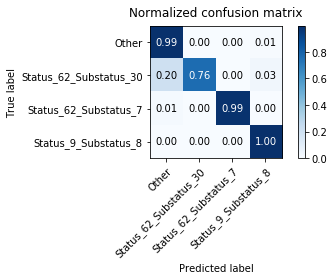

Total Accuracy 		0.992

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.993 		 0.991 		 0.992
Status_62_Substatus_30    	 0.980 		 0.764 		 0.858
Status_62_Substatus_7     	 0.961 		 0.987 		 0.974
Status_9_Substatus_8      	 0.994 		 0.996 		 0.995


In [10]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [11]:
rf

,importance
ActivePower,0.167368
Log-T-Raw-TransformerTemperature,0.088770
Log-T-Raw-Rectifier1HeatSink,0.087743
Log-T-Raw-Rectifier2HeatSink,0.045738
Log-T-Raw-Stator2Temperature,0.040117
Log-T-Raw-Stator1Temperature,0.039771
Log-T-Raw-Rotor2Temperature,0.037898
Average blade angle across A B C,0.037526
Log-T-Raw-Rotor1Temperature,0.035765
Log-T-Raw-NacelleAmbientTemperature,0.035171


# Preprocessing

### Scale dataset

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train)
X_train_scaled = X_train_scaled.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=list(X))
X_train.head(10)

X_test_scaled = scaler.fit(X_test)
X_test_scaled = X_test_scaled.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X))
X_test_scaled.head(10)

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.474771,0.267760,0.497039,0.952646,0.087391,0.513514,0.593023,0.324675,0.529412,0.547619,...,0.849462,0.895349,0.527273,0.631579,0.403846,0.435294,0.259259,0.262136,0.182710,0.683999
1,0.575115,0.054645,0.293147,0.562674,0.000000,0.567568,0.534884,0.298701,0.611765,0.595238,...,0.376344,0.418605,0.581818,0.355263,0.576923,0.541176,0.407407,0.368932,0.000000,0.734993
2,0.516628,0.150273,0.508037,0.339833,0.000000,0.378378,0.476744,0.259740,0.423529,0.416667,...,0.795699,0.802326,0.381818,0.486842,0.192308,0.294118,0.148148,0.184466,0.126981,0.533427
3,0.484805,0.256831,0.805838,0.387187,0.381606,0.675676,0.755814,0.383117,0.588235,0.595238,...,0.634409,0.744186,0.545455,0.592105,0.423077,0.541176,0.407407,0.446602,0.000108,0.545272
4,0.509461,0.377049,0.889171,0.334262,0.977528,0.621622,0.662791,0.272727,0.411765,0.452381,...,0.655914,0.639535,0.218182,0.328947,0.173077,0.541176,0.388889,0.669903,0.145629,0.524393
5,0.507741,0.153005,0.501692,0.774373,0.096546,0.581081,0.627907,0.318182,0.517647,0.535714,...,0.548387,0.581395,0.472727,0.342105,0.230769,0.423529,0.240741,0.446602,0.000000,0.840393
6,0.459289,0.193989,0.527496,0.576602,0.107782,0.527027,0.616279,0.298701,0.541176,0.559524,...,0.677419,0.697674,0.472727,0.565789,0.384615,0.411765,0.185185,0.203883,0.170745,0.663923
7,0.464163,0.161202,0.531303,0.426184,0.108614,0.662162,0.686047,0.363636,0.611765,0.630952,...,0.666667,0.697674,0.618182,0.578947,0.557692,0.564706,0.407407,0.388350,0.000000,0.558924
8,0.487959,0.090164,0.322758,0.885794,0.011652,0.608108,0.604651,0.331169,0.588235,0.607143,...,0.602151,0.581395,0.545455,0.368421,0.384615,0.447059,0.333333,0.368932,0.000000,0.906846
9,0.508314,0.174863,0.560068,0.356546,0.142738,0.662162,0.720930,0.344156,0.552941,0.583333,...,0.645161,0.720930,0.545455,0.552632,0.365385,0.529412,0.407407,0.475728,0.000000,0.539651


### SVM method

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.97163636 0.         0.         0.02836364]
 [0.98425197 0.         0.         0.01574803]
 [0.94452663 0.         0.00221893 0.05325444]
 [0.45509091 0.         0.         0.54490909]]


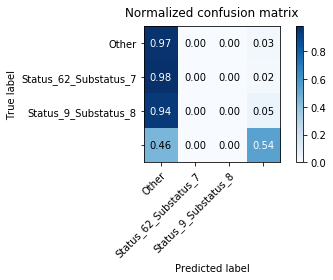

Plotting Performance Measure...
Total Accuracy 		0.726

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.643 		 0.972 		 0.774
Status_62_Substatus_7     	 1.000 		 0.002 		 0.004
Status_9_Substatus_8      	 0.943 		 0.545 		 0.691


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

In [13]:
svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
sm = SMOTE(random_state=12)
X_